# Creating a Convolutional Neural Network for Image Classification 

In this notebook, we'll learn how to create a convolutional neural network for multi-categorical image classification using the FashionMNIST dataset. Almost all of this notebook will look identical to the previous chapter on a non-convlutional neural network except for the new model being introduced. Because of this, we won't spend as much time explaining the identical code.


Here we import our libraries.

In [1]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder

## Processing data 

We utilize the built in training/test set split and reshape our images to be identical vectors. Afterwards, we normalize the image RGB values between 0 and 1. Lastly, we encode our labels to be binary 0 or 1 corresponding to their respective category.

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

# 60,000 training images, 10,000 test images
(training_imgs, training_labels), (test_imgs, test_labels) = fashion_mnist.load_data()

In [3]:
training_imgs = training_imgs.reshape((training_imgs.shape[0], 28, 28, 1))
training_imgs = training_imgs/255.0
test_imgs = test_imgs/255.0

In [4]:

test_imgs = test_imgs.reshape((test_imgs.shape[0], 28, 28, 1))

In [5]:
encoder1 = OneHotEncoder(sparse=False)
encoder2 = OneHotEncoder(sparse=False)
training_labels = training_labels.reshape(-1, 1)
test_labels = test_labels.reshape(-1, 1)
training_labels = encoder1.fit_transform(training_labels)
test_labels = encoder2.fit_transform(test_labels)

## Building our model

This neural network looks quite different from our previous model, although many factors do stay the same. You'll notice that there are two new elements: a convolutional layer (Conv2D) and a max pooling layer (MaxPooling2D). 

Looking at the model summary, you can start to piece together what each of these layers accomplish. 

A convolutional layer applies a filter to an image to build a new image by applying that filter. This helps us extract relevant information from a picture and discard any information that is not relevant to our image classification problem.

`tf.keras.layers.Conv2D(32, (3,3), activation='relu',  input_shape=(28,28,1))` translates to: apply 32 output filters in our convolution, use a `3x3` convolution window, a `ReLU` activation function, and use our images with an input of `28x28` pixels. 

A max pooling layer works to reduce the dimensions (pixels) of our input images. With a filter size of `2x2`, and a default stride of 2 (stride affects how many pixels are skipped over when our filter looks at an input image), our output dimensions will be cut in half `(None, 26, 26, 32)` to  `(None, 13, 13, 32)`. We keep the results from our filtered image and perhaps enhance relevant details. Because of this, max pooling is useful to simplify computation and reduce overfitting.



In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',  input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')

])

In [7]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               102528    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

## Training our model 

Now we can train our model. How does this convolutional model compare to the standard neural network model that we creatd in the previous chapter?

In [8]:
hist = model.fit(training_imgs, training_labels, verbose=1, epochs=10, validation_split=0.3)

Epoch 1/10
1313/1313 [==============================] - 42s 31ms/step - loss: 1.4778 - accuracy: 0.4700 - val_loss: 0.7397 - val_accuracy: 0.7352
Epoch 2/10
1313/1313 [==============================] - 30s 23ms/step - loss: 0.6413 - accuracy: 0.7569 - val_loss: 0.5617 - val_accuracy: 0.7841
Epoch 3/10
1313/1313 [==============================] - 30s 23ms/step - loss: 0.5493 - accuracy: 0.7936 - val_loss: 0.5226 - val_accuracy: 0.8054
Epoch 4/10
1313/1313 [==============================] - 35s 27ms/step - loss: 0.4967 - accuracy: 0.8156 - val_loss: 0.4609 - val_accuracy: 0.8343
Epoch 5/10
1313/1313 [==============================] - 34s 26ms/step - loss: 0.4595 - accuracy: 0.8346 - val_loss: 0.4519 - val_accuracy: 0.8354
Epoch 6/10
1313/1313 [==============================] - 29s 22ms/step - loss: 0.4280 - accuracy: 0.8446 - val_loss: 0.4205 - val_accuracy: 0.8488
Epoch 7/10
1313/1313 [==============================] - 27s 20ms/step - loss: 0.4091 - accuracy: 0.8509 - val_loss: 0.4338 -

We can look at the model's accuracy and loss per epoch below.

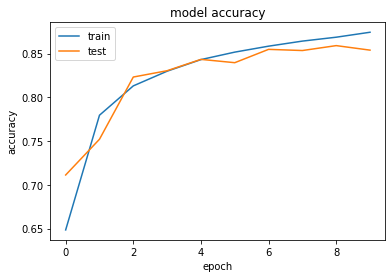

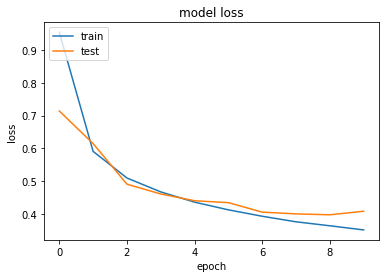

In [10]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## Evaluating our model

The process for evaluating our model follows from previous notebooks. We will see the model's confidence score in its predictions on the test set, print a classification report, then plot a few results from the test set.

In [11]:
from sklearn.metrics import classification_report

testingPredictions = model.predict(test_imgs)
testingPredictions = list(testingPredictions.argmax(axis=-1))
confidence_scores = model.predict(test_imgs, batch_size=32)
np.set_printoptions(suppress=True)
print(confidence_scores)


[[0.00000709 0.00000001 0.00000064 ... 0.15176192 0.0010076  0.841376  ]
 [0.00011659 0.         0.99974793 ... 0.         0.00000351 0.        ]
 [0.00000001 0.9999989  0.00000001 ... 0.         0.00000001 0.        ]
 ...
 [0.00085989 0.00000001 0.00061305 ... 0.00000297 0.99482006 0.00000001]
 [0.00000125 0.99861014 0.00000136 ... 0.00000053 0.00000133 0.00000171]
 [0.00031977 0.00000504 0.00055092 ... 0.6822022  0.03808242 0.00122679]]


In [14]:
from sklearn.metrics import classification_report

target_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(classification_report(test_labels.argmax(axis=-1), testingPredictions, target_names=target_names))

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.78      0.81      1000
     Trouser       0.99      0.96      0.97      1000
    Pullover       0.62      0.90      0.74      1000
       Dress       0.84      0.90      0.87      1000
        Coat       0.80      0.65      0.71      1000
      Sandal       0.99      0.88      0.93      1000
       Shirt       0.69      0.51      0.59      1000
     Sneaker       0.86      0.96      0.91      1000
         Bag       0.94      0.97      0.96      1000
  Ankle boot       0.95      0.95      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.84     10000
weighted avg       0.85      0.85      0.84     10000



In [12]:
def plot_image(i, predictions_array, confidence_scores, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)


  #predicted_label = np.argmax(predictions_array)
  #print(predicted_label, true_label)
  if predictions_array[i] == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(target_names[predictions_array[i]],
                                100*np.max(confidence_scores[i]),
                                target_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

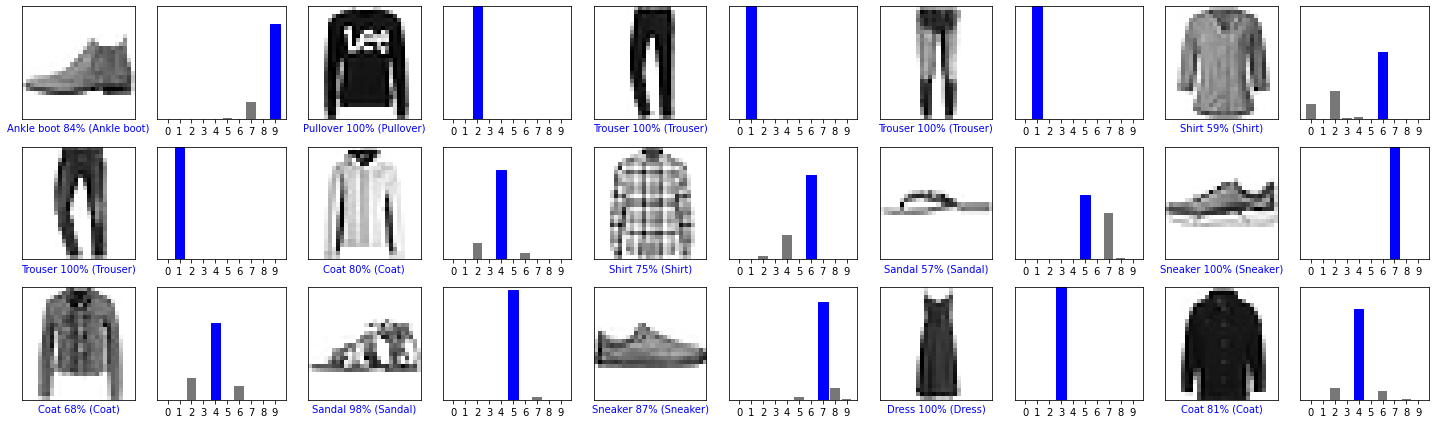

In [13]:
num_rows = 3
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
vec = np.vectorize(confidence_scores)
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, testingPredictions, confidence_scores, test_labels.argmax(axis=-1), test_imgs)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, list(confidence_scores)[i], test_labels.argmax(axis=-1))
plt.tight_layout()
plt.show()

Now, we need to export the data in order to support some interactive visualizations that we've created. Feel free to skip over this code block and move to the interactive visualizations below.

In [15]:
# output data as json 
import json
import os
import sys

output_directory = "libraries/"
output_filename = "predict_img_cnn.json"
full_path = os.path.join(output_directory, output_filename)

true_label = []
for i in range(len(test_labels)):
    for j in range(len(test_labels[i])):
        if test_labels[i][j] == 1:
            true_label.append(target_names[j])

for i in range(len(testingPredictions)):
    target_i = testingPredictions[i]
    testingPredictions[i] = target_names[target_i]

data = []
data.extend([{
      'index': i,
      'true_label': true_label[i],
      'predicted_label': testingPredictions[i],
      'confidence_score': confidence_scores.tolist()[i]
  } for i in range(len(testingPredictions))])



with open(full_path, 'w') as outfile:
    json.dump(data, outfile, indent=4, sort_keys=False)